# Praktické použití K-means v Pythonu

## Cíl lekce

Po dokončení této lekce budete:
- **Umět použít K-means** z knihovny sklearn
- **Chápat důležitost škálování** dat
- **Automaticky najít** nejlepší počet skupin pomocí Silhouette skóre
- **Interpretovat výsledky** pro business rozhodnutí

## Proč potřebujeme škálovat data?

### Problém různých škál

Představte si tyto data o zákaznících:
- **Věk:** 25-60 let (rozsah 35)
- **Roční příjem:** 300 000 - 900 000 Kč (rozsah 600 000)

K-means měří vzdálenosti mezi body. Příjem má **mnohem větší čísla**, takže bude dominovat!

### Příklad problému:

Zákazník A: věk 25, příjem 300 000
Zákazník B: věk 60, příjem 300 000

**Bez škálování:** Algoritmus je uvidí jako téměř identické (příjem stejný)
**Se škálováním:** Algoritmus uvidí velký rozdíl ve věku

### Řešení: StandardScaler

Převede všechny hodnoty na stejnou škálu:
- Průměr = 0
- Rozptyl = 1

**⚠️ PRAVIDLO:** VŽDY škálujte data před K-means!

## Jak funguje K-means v sklearn?

### Základní kroky:

1. **Připravte data** (číselné hodnoty)
2. **Škálujte** pomocí StandardScaler
3. **Najděte nejlepší K** pomocí Silhouette skóre
4. **Spusťte K-means** s optimálním K
5. **Interpretujte** výsledky

### Hlavní parametry KMeans:

| Parametr | Výchozí | Význam |
|----------|---------|--------|
| n_clusters | 8 | Počet skupin (K) |
| init | 'k-means++' | Chytrá inicializace (lepší než 'random') |
| n_init | 10 | Kolikrát zkusit s různým startem |
| random_state | None | Pro reprodukovatelnost (např. 42) |

## Automatický výběr počtu skupin

### Silhouette skóre - jednoduché vysvětlení:

Pro každý bod měří:
1. **Jak blízko** je k bodům ve své skupině (dobré)
2. **Jak daleko** je od bodů v jiných skupinách (dobré)

**Hodnoty:**
- **Blízko +1** = Perfektní rozdělení
- **Kolem 0** = Skupiny se překrývají
- **Záporné** = Body jsou ve špatné skupině

### Jak vybrat K:

1. Zkusíme K = 2, 3, 4, 5...
2. Pro každé K spočítáme Silhouette skóre
3. Vybereme K s **nejvyšším skóre**

**Výhoda:** Počítač sám najde nejlepší počet skupin!

## Příklad: Segmentace 12 zákazníků

### Naše data:

| ID | Věk | Roční útrata (tis. Kč) | Očekávaná skupina |
|----|-----|------------------------|-------------------|
| 1 | 22 | 25 | Mladí šetřílci |
| 2 | 25 | 30 | Mladí šetřílci |
| 3 | 28 | 28 | Mladí šetřílci |
| 4 | 24 | 32 | Mladí šetřílci |
| 5 | 45 | 90 | Střední věk - premium |
| 6 | 48 | 95 | Střední věk - premium |
| 7 | 42 | 85 | Střední věk - premium |
| 8 | 50 | 88 | Střední věk - premium |
| 9 | 65 | 45 | Senioři |
| 10 | 68 | 40 | Senioři |
| 11 | 70 | 42 | Senioři |
| 12 | 67 | 48 | Senioři |

### Co vidíme?

3 přirozené skupiny:
- **Mladí** (věk ~25): málo utrácejí
- **Střední věk** (věk ~46): hodně utrácejí
- **Senioři** (věk ~67): středně utrácejí

## Import knihoven

Nyní, když rozumíme teorii, můžeme importovat potřebné knihovny:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Nastavení pro hezčí grafy
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

## Krok 1: Příprava dat

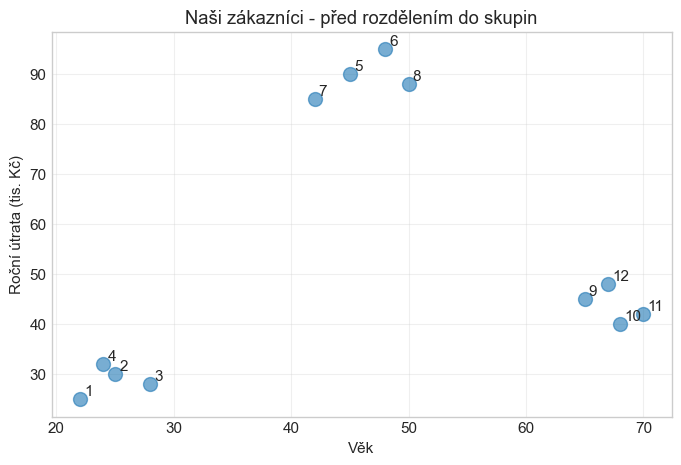

In [2]:
# Data našich 12 zákazníků
vek = [22, 25, 28, 24,  # Mladí
       45, 48, 42, 50,  # Střední věk
       65, 68, 70, 67]  # Senioři

utrata = [25, 30, 28, 32,  # Mladí
          90, 95, 85, 88,  # Střední věk
          45, 40, 42, 48]  # Senioři

# Převod na numpy array
X = np.array(list(zip(vek, utrata)))

# Vizualizace původních dat
plt.figure(figsize=(8, 5))
plt.scatter(vek, utrata, s=100, alpha=0.6)
plt.xlabel('Věk')
plt.ylabel('Roční útrata (tis. Kč)')
plt.title('Naši zákazníci - před rozdělením do skupin')
plt.grid(True, alpha=0.3)
for i in range(12):
    plt.annotate(f'{i+1}', (vek[i], utrata[i]), xytext=(3, 3), textcoords='offset points')
plt.show()

## Krok 2: Škálování dat (KRITICKÉ!)

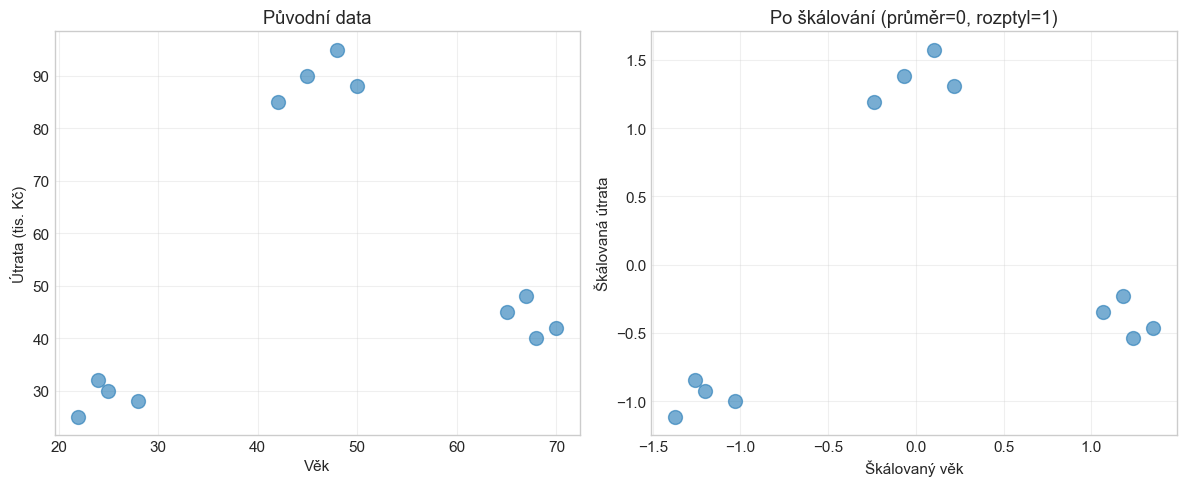

In [3]:
# Škálování dat
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Porovnání před a po škálování
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Před škálováním
ax1.scatter(X[:, 0], X[:, 1], s=100, alpha=0.6)
ax1.set_xlabel('Věk')
ax1.set_ylabel('Útrata (tis. Kč)')
ax1.set_title('Původní data')
ax1.grid(True, alpha=0.3)

# Po škálování
ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], s=100, alpha=0.6)
ax2.set_xlabel('Škálovaný věk')
ax2.set_ylabel('Škálovaná útrata')
ax2.set_title('Po škálování (průměr=0, rozptyl=1)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Krok 3: Automatické nalezení nejlepšího počtu skupin

K=2: Silhouette skóre = 0.519
K=3: Silhouette skóre = 0.875
K=4: Silhouette skóre = 0.737
K=5: Silhouette skóre = 0.535

✅ Nejlepší počet skupin: K = 3


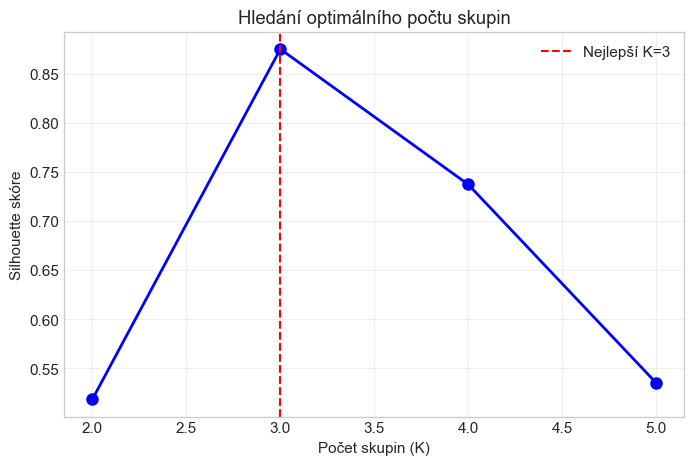

In [4]:
# Testujeme různé počty skupin
silhouette_scores = []
K_values = range(2, 6)  # Testujeme K = 2, 3, 4, 5

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"K={k}: Silhouette skóre = {score:.3f}")

# Najdeme nejlepší K
best_k = K_values[np.argmax(silhouette_scores)]
print(f"\n✅ Nejlepší počet skupin: K = {best_k}")

# Vizualizace
plt.figure(figsize=(8, 5))
plt.plot(K_values, silhouette_scores, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Počet skupin (K)')
plt.ylabel('Silhouette skóre')
plt.title('Hledání optimálního počtu skupin')
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Nejlepší K={best_k}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Krok 4: Finální clustering s nejlepším K

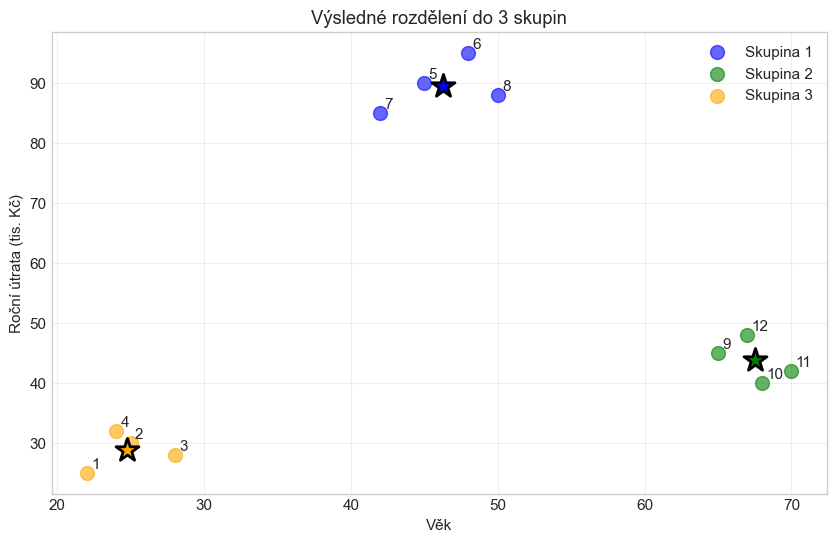

In [5]:
# Použijeme nejlepší K
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans_final.fit_predict(X_scaled)

# Získáme centroidy (převedeme zpět do původní škály)
centroids_scaled = kmeans_final.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)

# Vizualizace výsledků
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'orange']

for i in range(best_k):
    # Body v clusteru
    mask = clusters == i
    plt.scatter(X[mask, 0], X[mask, 1], 
               c=colors[i], s=100, alpha=0.6, 
               label=f'Skupina {i+1}')
    
    # Centroid (střed skupiny)
    plt.scatter(centroids[i, 0], centroids[i, 1], 
               c=colors[i], s=300, marker='*', 
               edgecolor='black', linewidth=2)

# Popisky zákazníků
for i in range(12):
    plt.annotate(f'{i+1}', (X[i, 0], X[i, 1]), 
                xytext=(3, 3), textcoords='offset points')

plt.xlabel('Věk')
plt.ylabel('Roční útrata (tis. Kč)')
plt.title(f'Výsledné rozdělení do {best_k} skupin')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Krok 5: Analýza výsledných skupin

In [6]:
# Analýza každé skupiny
for i in range(best_k):
    mask = clusters == i
    skupina_vek = X[mask, 0]
    skupina_utrata = X[mask, 1]
    
    print(f"\n📊 SKUPINA {i+1}:")
    print(f"  Zákazníci: {[j+1 for j in range(12) if clusters[j] == i]}")
    print(f"  Průměrný věk: {np.mean(skupina_vek):.1f} let")
    print(f"  Průměrná útrata: {np.mean(skupina_utrata):.0f} tis. Kč")
    print(f"  Počet zákazníků: {np.sum(mask)}")


📊 SKUPINA 1:
  Zákazníci: [5, 6, 7, 8]
  Průměrný věk: 46.2 let
  Průměrná útrata: 90 tis. Kč
  Počet zákazníků: 4

📊 SKUPINA 2:
  Zákazníci: [9, 10, 11, 12]
  Průměrný věk: 67.5 let
  Průměrná útrata: 44 tis. Kč
  Počet zákazníků: 4

📊 SKUPINA 3:
  Zákazníci: [1, 2, 3, 4]
  Průměrný věk: 24.8 let
  Průměrná útrata: 29 tis. Kč
  Počet zákazníků: 4


## Interpretace a business doporučení

### Nalezené segmenty:

| Segment | Charakteristika | Průměrný věk | Průměrná útrata | Strategie |
|---------|----------------|--------------|-----------------|------------|
| **Skupina 1** | Mladí šetřílci | ~25 let | ~29 tis. Kč | Slevy, věrnostní program |
| **Skupina 2** | Premium střední věk | ~46 let | ~90 tis. Kč | Premium produkty, osobní přístup |
| **Skupina 3** | Senioři | ~68 let | ~44 tis. Kč | Jednoduchost, tradice |

### Marketingové strategie:

**🎯 Skupina 1 - Mladí šetřílci:**
- Nabídnout studentské slevy
- Komunikace přes sociální média
- Důraz na hodnotu za peníze

**💎 Skupina 2 - Premium zákazníci:**
- VIP program s benefity
- Kvalitní produkty a služby
- Osobní péče a konzultace

**👴 Skupina 3 - Senioři:**
- Seniorské slevy
- Tradiční komunikační kanály
- Důraz na spolehlivost

## Kompletní kód pro vaše data

In [7]:
def segmentuj_zakazniky(data, max_k=5):
    """
    Automatická segmentace zákazníků pomocí K-means.
    
    Parametry:
    data: numpy array (řádky = zákazníci, sloupce = vlastnosti)
    max_k: maximální počet skupin k testování
    
    Vrací:
    labels: přiřazení ke skupinám
    best_k: optimální počet skupin
    """
    
    # 1. Škálování
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # 2. Najít nejlepší K
    best_score = -1
    best_k = 2
    
    print("Hledání optimálního počtu skupin...")
    for k in range(2, min(max_k + 1, len(data))):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data_scaled)
        score = silhouette_score(data_scaled, labels)
        print(f"K={k}: Silhouette skóre = {score:.3f}")
        
        if score > best_score:
            best_score = score
            best_k = k
    
    # 3. Finální clustering
    print(f"\n✅ Vybrán počet skupin: K={best_k}")
    kmeans = KMeans(n_clusters=best_k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    
    return labels, best_k

# Příklad použití
labels, best_k = segmentuj_zakazniky(X)
print(f"\nZákazníci rozděleni do {best_k} skupin")

Hledání optimálního počtu skupin...
K=2: Silhouette skóre = 0.519
K=3: Silhouette skóre = 0.875
K=4: Silhouette skóre = 0.737
K=5: Silhouette skóre = 0.535

✅ Vybrán počet skupin: K=3

Zákazníci rozděleni do 3 skupin
